In [3]:
import pandas as pd
from pandas import read_csv
import seaborn as sns

df = read_csv('Clean_Dataset.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
# storing the Dependent Variables in X and Independent Variable in Y
x = df.drop(['price'], axis=1)
y = df['price']
# Splitting the Data into Training set and Testing Set

In [5]:
# Coverting the labels into a numeric form using Label Encoder

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
# Scaling the values to convert the int values to Machine Languages

((210107, 11), (90046, 11), (210107,), (90046,))

In [6]:


from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))
x_train = mmscaler.fit_transform(x_train)
x_test = mmscaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
a = {'Model Name': [], 'Mean_Absolute_Error_MAE': [], 'Adj_R_Square': [], 'Root_Mean_Squared_Error_RMSE': [],
     'Mean_Absolute_Percentage_Error_MAPE': [], 'Mean_Squared_Error_MSE': [], 'Root_Mean_Squared_Log_Error_RMSLE': [],
     'R2_score': []}
Results = pd.DataFrame(a)
Results.head()
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor(tree_method='gpu_hist')
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)
# Evalution matrix for all the algorithms
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelXGR, modelbag, modelRE, modelLO]

for models in MM:
    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))


    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100


    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred), 6)
    adjusted_r_squared = round(1 - (1 - r_squared) * (len(y) - 1) / (len(y) - x.shape[1] - 1), 6)
    print('Adj R Square: ', adjusted_r_squared)
    print(
        '------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name': models,
               'Mean_Absolute_Error_MAE': metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square': adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE': result,
               'Mean_Squared_Error_MSE': metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score': metrics.r2_score(y_test, y_pred)}


#Trainig the model with
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelETR.predict(x_test)
out = pd.DataFrame({'Price_actual': y_test, 'Price_pred': y_pred})
result = df.merge(out, left_index=True, right_index=True)
result.sample(10)



Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.541
Mean Squared Error (MSE): 49057844.123
Root Mean Squared Error (RMSE): 7004.131
R2_score: 0.90468
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904677
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1118.829
Mean Squared Error (MSE): 12124831.182
Root Mean Squared Error (RMSE): 3482.073
R2_score: 0.976441
Root Mean Squared Log Error (RMSLE): 8.155
Mean Absolute Percentage Error (MAPE): 7.6 %
Adj R Square:  0.97644
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1064.288
Mean Squared Error (MSE): 7371730.397
Root Mean Squared Error (RMSE): 2715.093
R2_score: 0.985677
Root Mean Squared Log Error (RMSLE): 7.907
Mean 

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
276240,276240,5,1520,3,5,0,2,2,0,19.33,30,51875,51875,52262.50
261213,261213,5,1473,0,2,0,4,1,0,14.25,48,60396,60396,60396.00
111706,111706,5,1473,0,2,0,0,3,1,16.92,19,6133,6133,6134.29
208550,208550,5,1530,2,0,0,4,5,0,19.25,19,41281,41281,41281.00
106496,106496,2,964,0,2,0,1,4,1,14.83,28,5177,5177,5256.36
6264,6264,1,900,2,1,0,0,5,1,9.75,32,3291,3291,3662.45
130433,130433,5,1445,4,1,0,5,5,1,12.92,20,6711,6711,6694.98
290910,290910,1,722,1,1,0,5,5,0,15.08,11,49553,49553,49553.00
182283,182283,2,995,1,1,0,2,2,1,11.58,16,4827,4827,4815.06
104011,104011,5,1473,0,2,0,4,4,1,13.92,11,13258,13258,12642.10


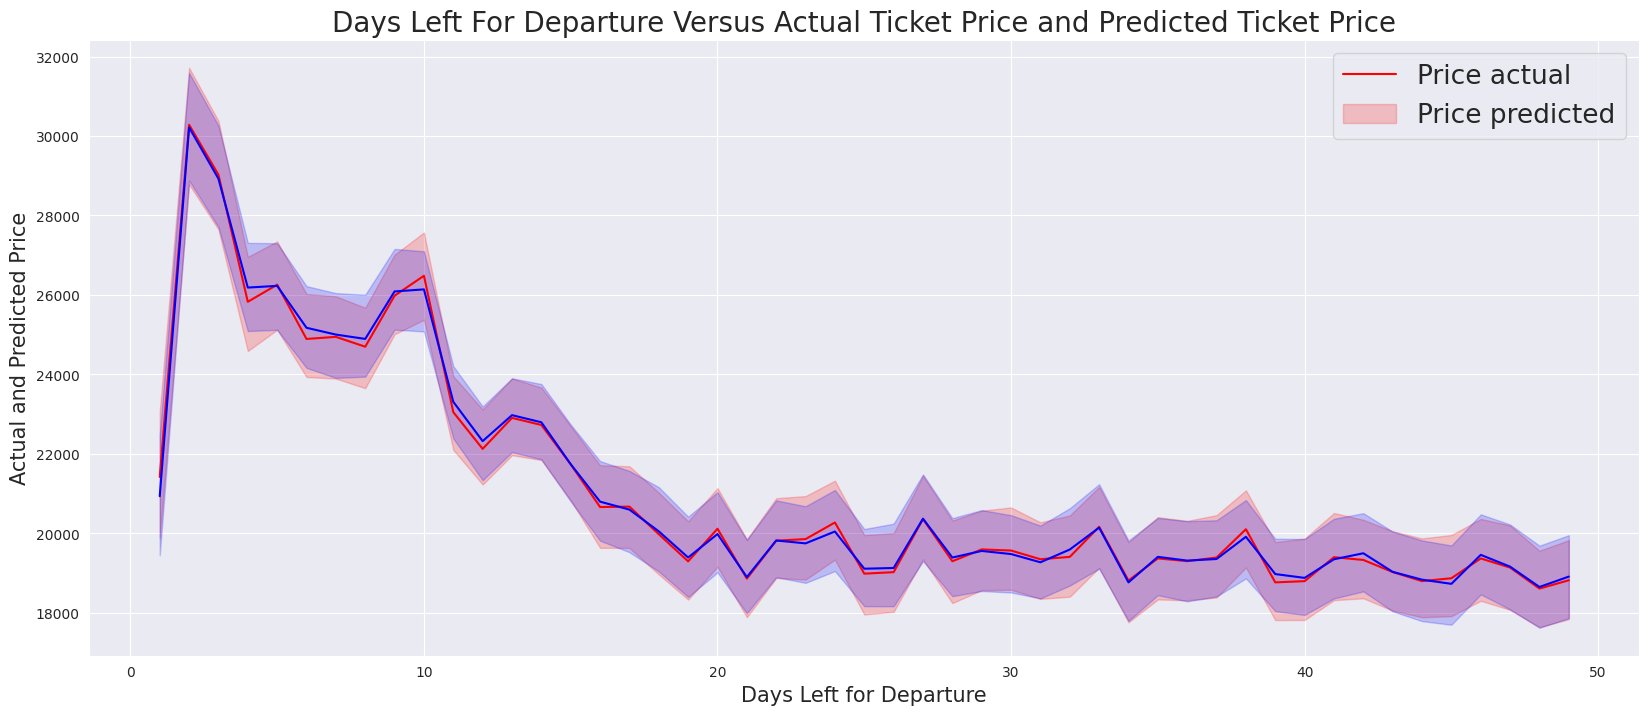

In [7]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=result, x='days_left', y='Price_actual', color='red')
sns.lineplot(data=result, x='days_left', y='Price_pred', color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price', fontsize=20)
plt.legend(labels=['Price actual', 'Price predicted'], fontsize=19)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Actual and Predicted Price', fontsize=15)
plt.show()

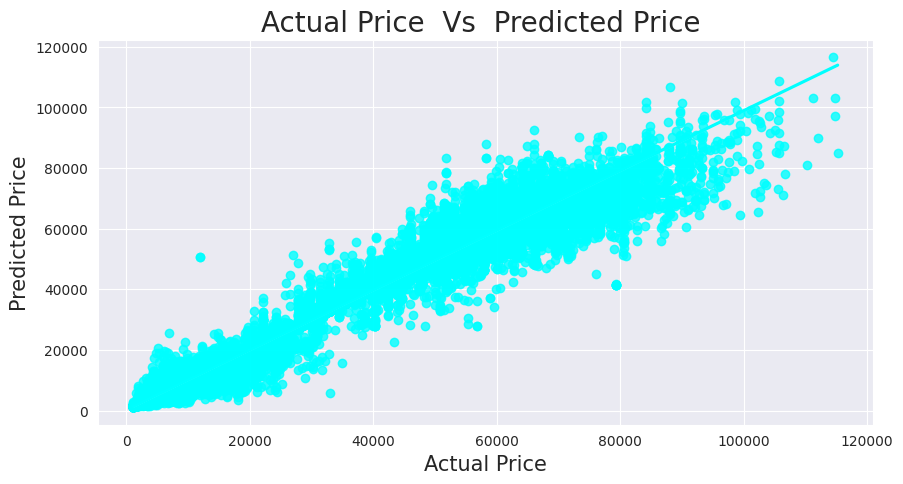

In [8]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Price_actual', y='Price_pred', data=result, color='cyan')
plt.title('Actual Price  Vs  Predicted Price ', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()